<a href="https://colab.research.google.com/github/sumukhbhat12/Tensor-Flow-Course-FreeCodeCamp/blob/main/Neural_Networks_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Dataset : Fashion MNIST

https://www.tensorflow.org/datasets/catalog/fashion_mnist

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist   #Load the dataset from the keras

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [3]:
print(train_images.shape)
print(train_labels.shape)
m = train_images.shape[1]
n = train_images.shape[2]
print(m,n)

(60000, 28, 28)
(60000,)
28 28


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

check out how images look like

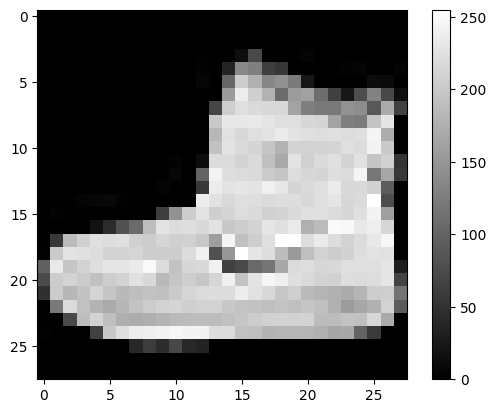

In [5]:
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.show()

preprocessing

better for the values to be in the range 0-1 because weights are small so, the larger the value and smaller the weights, the slower the training process.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

build the model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(m,n)),    #m -> 28, n -> 28
    tf.keras.layers.Dense(128, activation='relu'),    # Hidden Layer
    tf.keras.layers.Dense(10, activation='softmax')   # Output Layer
])

In [8]:
model.compile(
    # optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   # sparse categorical crossentropy allows the labels to be directly given, like [1, 3, 2] etc instead of needing to be one hot encoded like [[0,1,0,0], [0,0,0,1], [0,0,1,0]]
    metrics=['accuracy']
)

Training the model

default batch size is 32, hence 1875 batches total ( 1875 x 32 = 60000 )

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.4978 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3769 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3376 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3127 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2942 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2785 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2685 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2570 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2468 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0

In [10]:
model.history.history['accuracy'][-1]

0.9111166596412659

Evaluate the model

In [11]:
_, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8826


In [12]:
accuracy

0.8826000094413757

prediction

In [52]:
def test_prediction(index):
  current_image = test_images[index]

  prediction = np.argmax(model.predict(current_image.reshape((-1,28,28))))
  label = test_labels[index]

  print("Prediction : ", class_names[prediction])
  print("label : ", class_names[label])

  current_image = current_image * 255    #because we normalized it at the start by dividing by 255

  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

1/1 [==============================] - 0s 22ms/step
Prediction :  Ankle boot
label :  Ankle boot


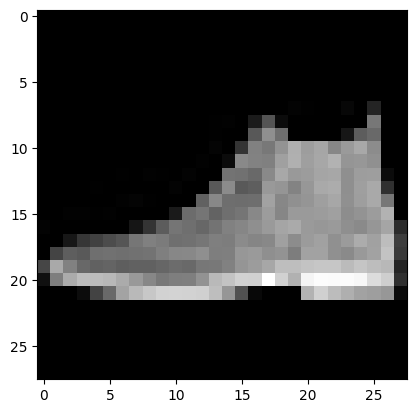

In [50]:
test_prediction(0)

1/1 [==============================] - 0s 39ms/step
Prediction :  Pullover
label :  Pullover


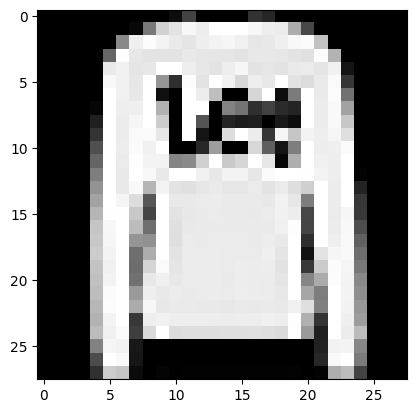

In [51]:
test_prediction(1)

1/1 [==============================] - 0s 41ms/step
Prediction :  Dress
label :  Dress


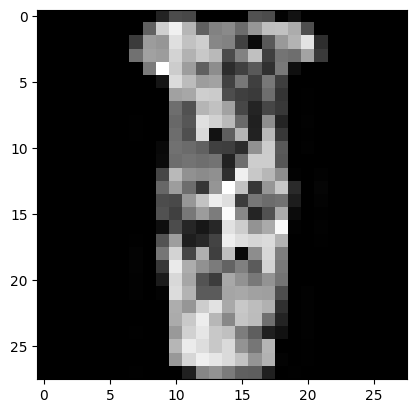

In [41]:
test_prediction(100)

1/1 [==============================] - 0s 23ms/step
Prediction :  T-shirt/top
label :  Shirt


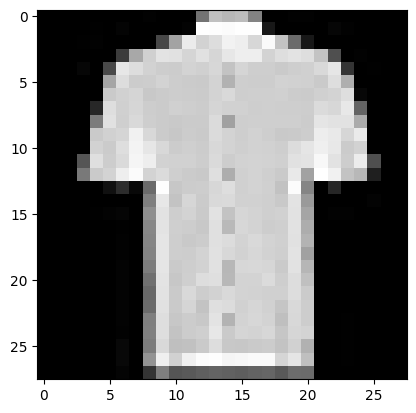

In [61]:
test_prediction(40)